# Objectvie:
  - To compare the performance of **Light GBM** and **XG Boost** algorithms using Titanic dataset.

---

## Importing Necessary libraries:

In [647]:
import pandas as pd                      # Data manipulation and analysis
import numpy as np                       # To perform numerical tasks/statistics
import matplotlib.pyplot as plt          # Data visualization
import seaborn as sns                    # Enhanced data visualization
import warnings
warnings.filterwarnings('ignore')        # To avoid any warning disclaimer

In [648]:
# Uploading and reading the csv files:
df_train = pd.read_csv('Titanic_train.csv')
print(f"Training set of Titanic data:\n {df_train.head()}")
print('---')
df_test = pd.read_csv('Titanic_test.csv')
print(f"Testing set of Titanic data:\n {df_test.head()}")

Training set of Titanic data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

**The dataset is already splitted into training set and testing set, however; we'll perform EDA on both DataFrames**

# EDA:

## Information on data:
---

In [652]:
# Shape of training set:
df_train.shape                   # Contains Target Variable

(891, 12)

In [653]:
# Shape of testing set:
df_test.shape                    # Contains only Features

(418, 11)

In [654]:
# Information on training set:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - **Training set** contains total of 891 rows with few null values and 12 columns.

In [656]:
# Information on testing set:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


 - **Testing set** contains 418 rows also with a few NaN values. Here there are only 11 columns (No target).

In [658]:
# Descriptive Statistics:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Insights:
 - Dataset is based on titanic survival through various features.
 - Where average amount of passengers are aged between 29-30.
 - Most of the passengers belong to Pclass - 3 with an average to passengers travelling in 2 Pclass.
 - Passengers in Pclass 1 paid the highest fare (up to 512), while many others paid low to no fare.
 - Around 38% of passengers survived, meaning more than 60% did not survive.

In [660]:
# Checking for duplicated values:
df_train[df_train.duplicated]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [661]:
# Checking for duplicated values:
df_test[df_test.duplicated]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**No duplicate values in both the sets**

In [663]:
# Before moving forward, will drop columns that do not contribute in model building such as unique identifier columns:
df_train.head()  # Columns such as PassengerId, Name, Ticket and Cabin.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [664]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [665]:
# Dropping the selected columns from training & testing set:
df_train.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [666]:
# Resetting both set's index:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [667]:
# Check both the data sets:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [668]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Missing Values:
---

In [670]:
# Checking missing values for both Train and Test set:
print(f"Training Set:\n\n {df_train.isnull().sum()}")
print('')
print(f"Testing Set:\n\n {df_test.isnull().sum()}")

Training Set:

 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Testing Set:

 Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


#### Handling missing values for Training set for columns "Age", "Embarked" :

In [672]:
# Checking only null columns
df_train[['Age','Embarked']].isnull().sum()

Age         177
Embarked      2
dtype: int64

In [673]:
# Age is numeric column which will handle by fillna with median value and fill Embarked with most frequent category in it.
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)  # NaN values handled by median of the column.
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)  # Null values replaced with most frequent categorical value of column.

In [674]:
# Confirm the changes:
df_train[['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

#### Handling missing values for Testing Set for columns "Age", "Fare" :
 - Will use df_train's median values to fill df_test's column's values to maintain consistency and avoid data leakage.

In [676]:
# Checking only null columns:
df_test[['Age','Fare']].isnull().sum()

Age     86
Fare     1
dtype: int64

In [677]:
# Replacing Null values in df_test with df_train column median values:
df_test['Age'].fillna(df_train['Age'].median(), inplace =True)
df_test['Fare'].fillna(df_train['Fare'].median(), inplace =True)

In [678]:
# Confirm the changes:
df_test[['Age','Fare']].isnull().sum()

Age     0
Fare    0
dtype: int64

**Missing values for both sets are treated**

## Data Visualization:
---

### Histogram Plot to understand distribution of the data:

In [682]:
# Creating a function which will loop through all columns and visualize each column - Histplot.

def histplot(data, columns):                                           # Function named histplot(parameters)
    for col in columns:                                                # For loop to iterate through every column in the data
        plt.figure(figsize=(12,10))                                    # Configure plot size

        sns.histplot(data=data, x=data[col], bins=15, kde=True, palette = 'rocket')  # Histogram plot from seaborn

        # Calcualting skewness:
        skew = data[col].skew()

        # Skewness type:
        if skew >= 0.5:
            skew_text = 'Right Skewed ->'
            text_x = data[col].max() - (data[col].max() * 0.5)  # Place text near to right
        elif skew >= -0.5:
            skew_text = '<- Left Skewed'
            text_x = data[col].min() + (data[col].max() * 0.2)  # Place text near to left
        else:
            skew_text = 'Normally Distributed'
            text_x = data[col].median()                         # Center point

        # Add annotation to the plot
        plt.text(text_x, plt.ylim()[1] * 0.7, skew_text, fontsize = 12, fontweight='bold', color = 'black')

        plt.title('Distribution Plot')                          # Title of the plot
        plt.xlabel(f'Histogram Distribution plot of {col}', fontsize=15)     # Labels
        plt.show()                                              # Display the plot

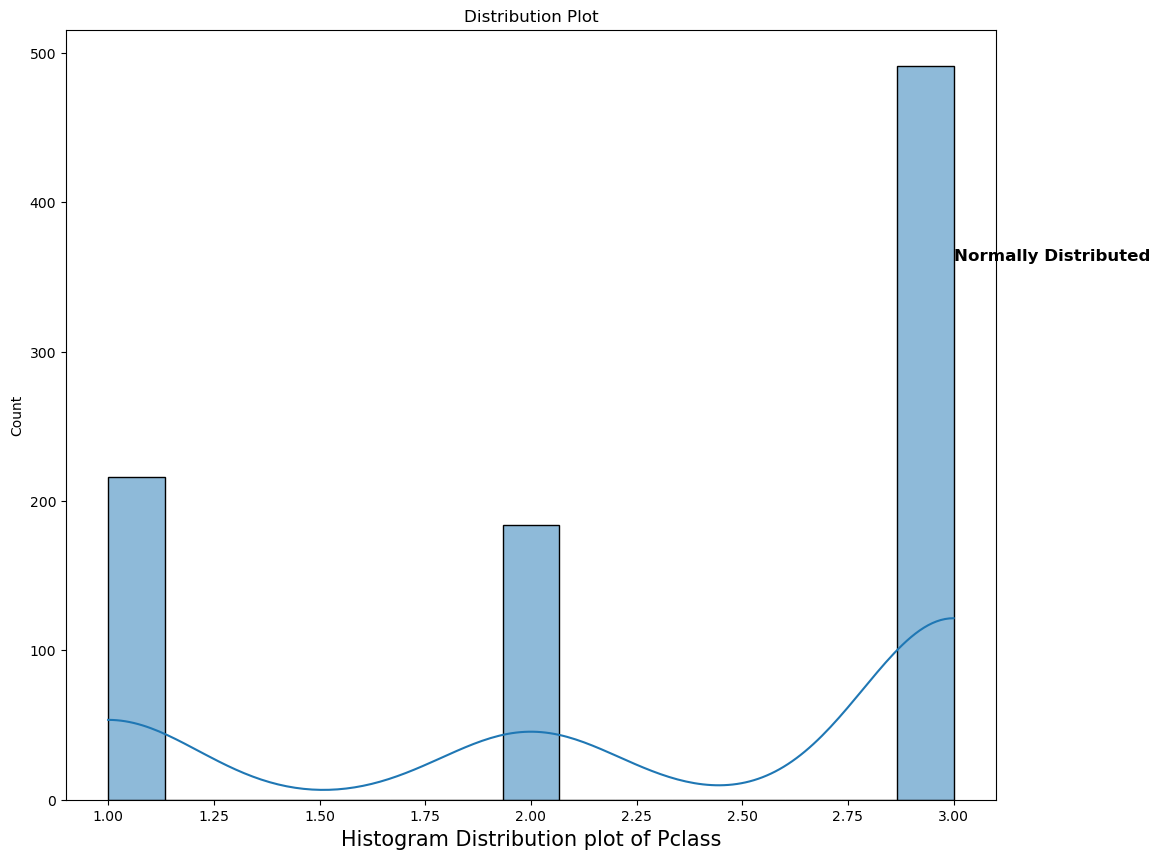

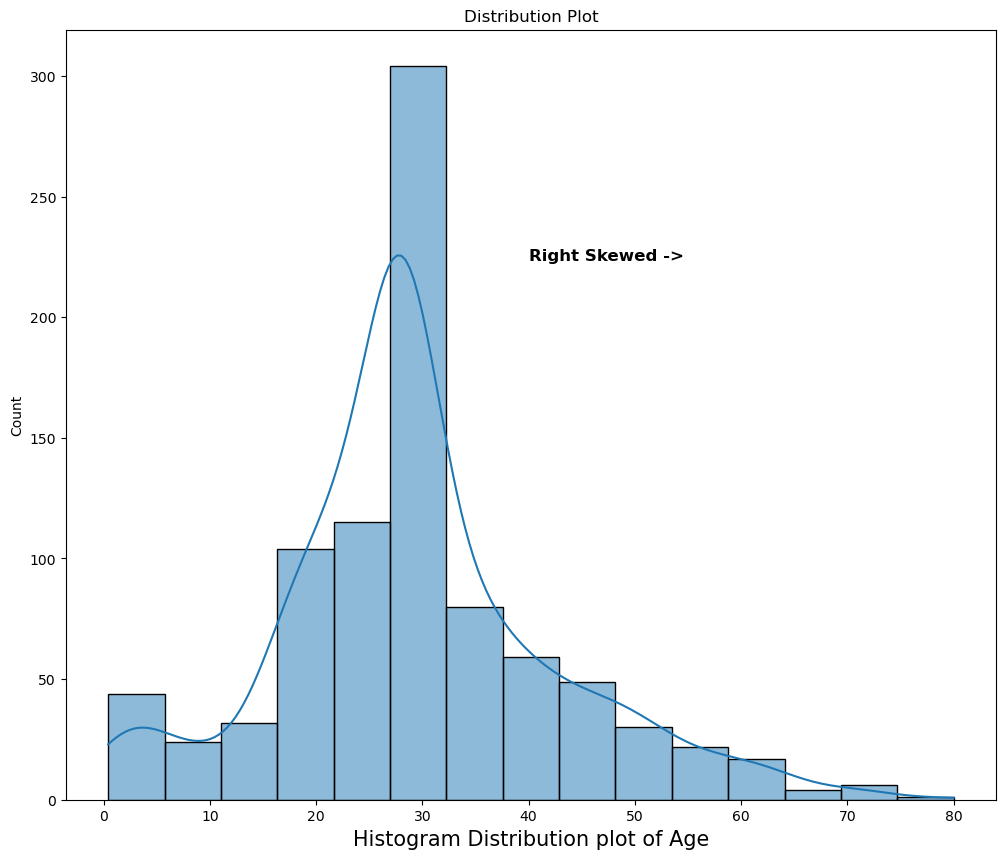

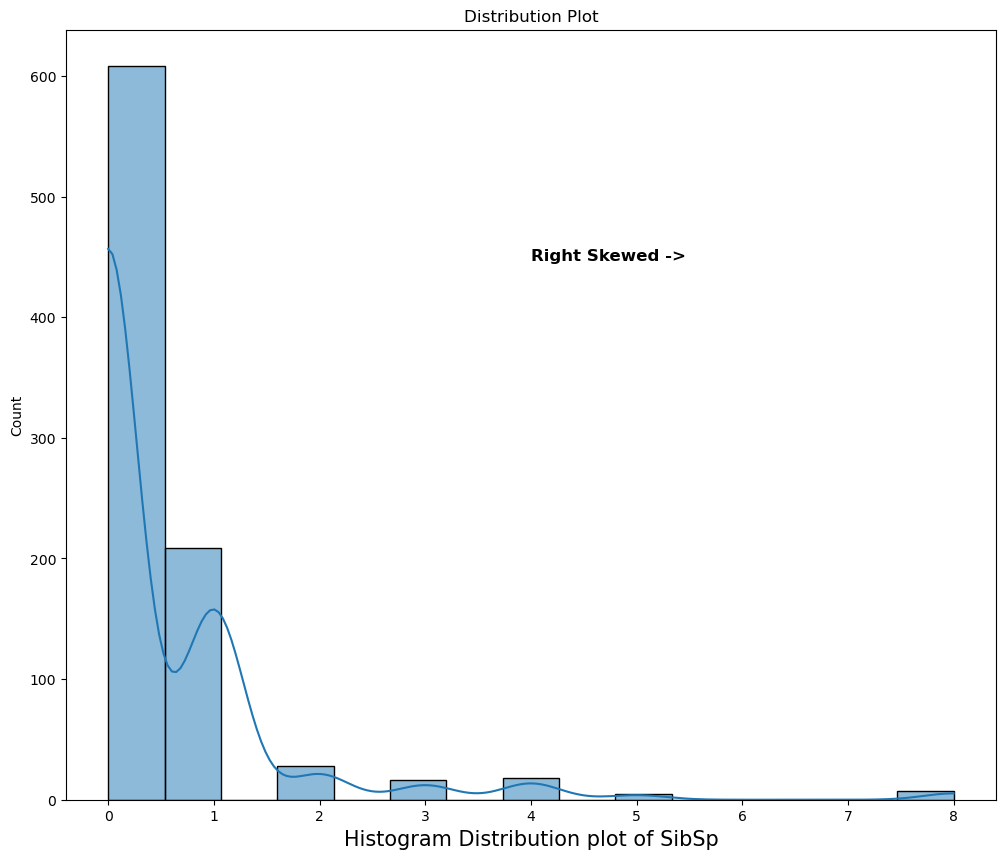

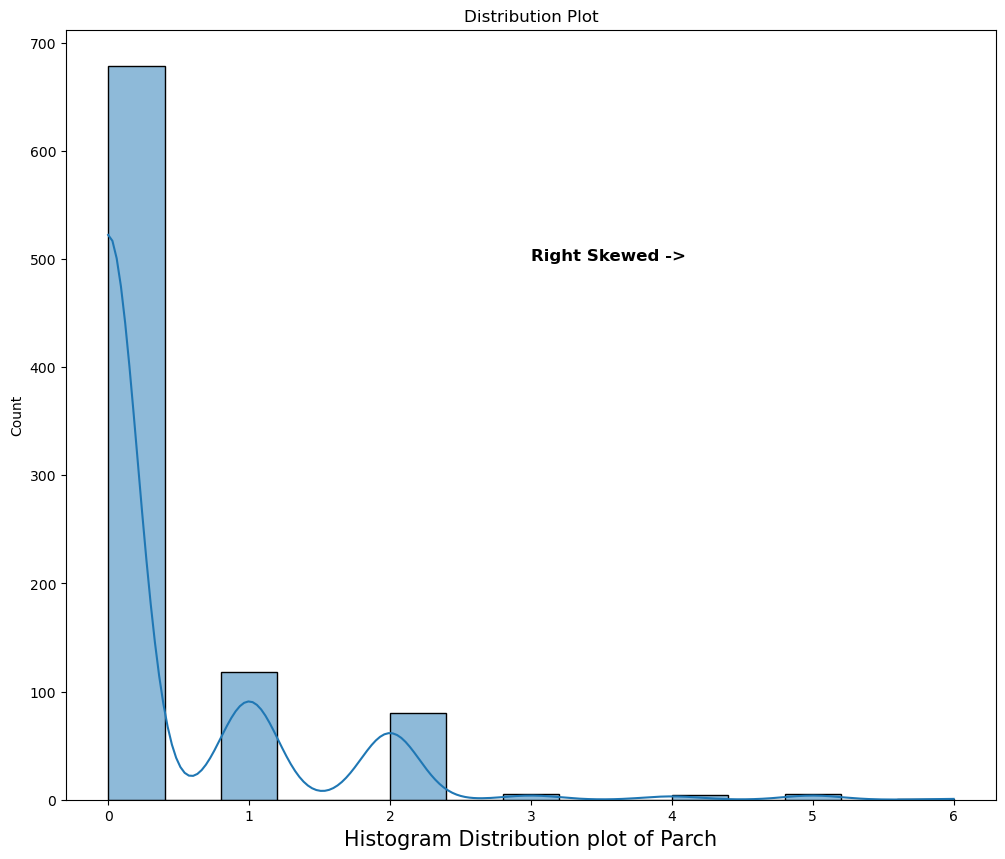

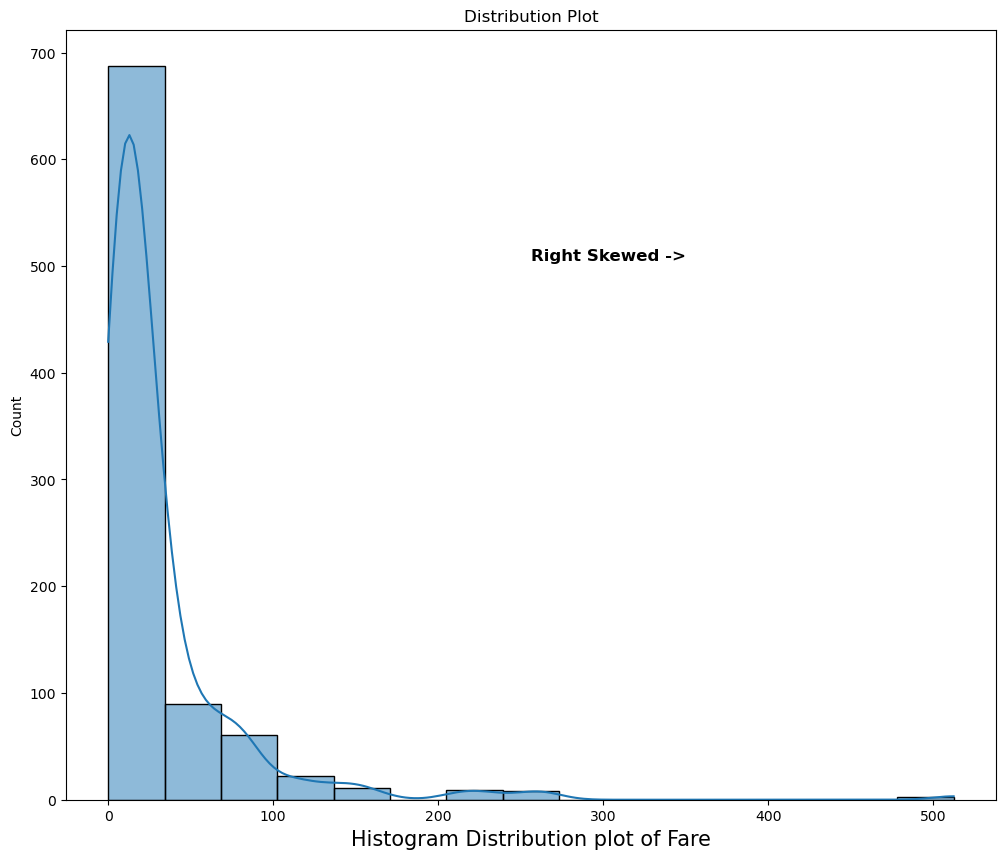

In [683]:
# Run the function:
df_train_num = df_train.select_dtypes(include='number')
histplot(df_train_num, df_train_num.drop(columns='Survived', axis=1).columns)

### Most the distribution is right skewed, however;
 - Extreme values in Age, Sibsp and Parch represent real world data.
 - Passengers of all ages are aboard the titanic from elders to infants showing meaningful data.
 - Removing such values could result in losing important patterns in survival predictions.
 - Large number of families travelling together is a proper representation of real world based scenario.


### Will the distribution as it is and if needed, apply scaling methods to bring down the values to a range.

### Plotting a Countplot to check Categorical visual:

In [686]:
# Creating a function with for loop to visualize all categorical columns

def countplot(data, columns):
    # Looping through each column in the provided columns list
    for col in columns:
        # Creating a new figure with a size of 15x8 inches for each column
        plt.figure(figsize=(15,8))
        
        # Creating the countplot for the current column using Seaborn
        ax = sns.countplot(data=data, x=data[col], palette='rocket')
        
        # Rotating x-axis tick labels to 90 degrees for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

        # Looping through each bar (patch) in the countplot to add count labels on top
        for p in ax.patches:
            # Annotating each bar with its count (height of the bar)
            ax.annotate(f"{p.get_height()}", 
                        (p.get_x() + p.get_width()/2., p.get_height()),  # Position of the label (centered on top of the bar)
                        ha='center', va='center',  # Aligning the label in the center horizontally and vertically
                        fontsize=12, color='black',  # Setting label font size and color
                        xytext=(0, 10), textcoords='offset points')  # Adjusting the label position slightly above the bar
        
        # Setting the title for the plot
        plt.title('Countplot', fontsize=20)
        
        # Setting the x-axis label to indicate the counts for the current column
        plt.xlabel(f"Counts of {col}", fontsize=15)
        
        # Displaying the plot
        plt.show()

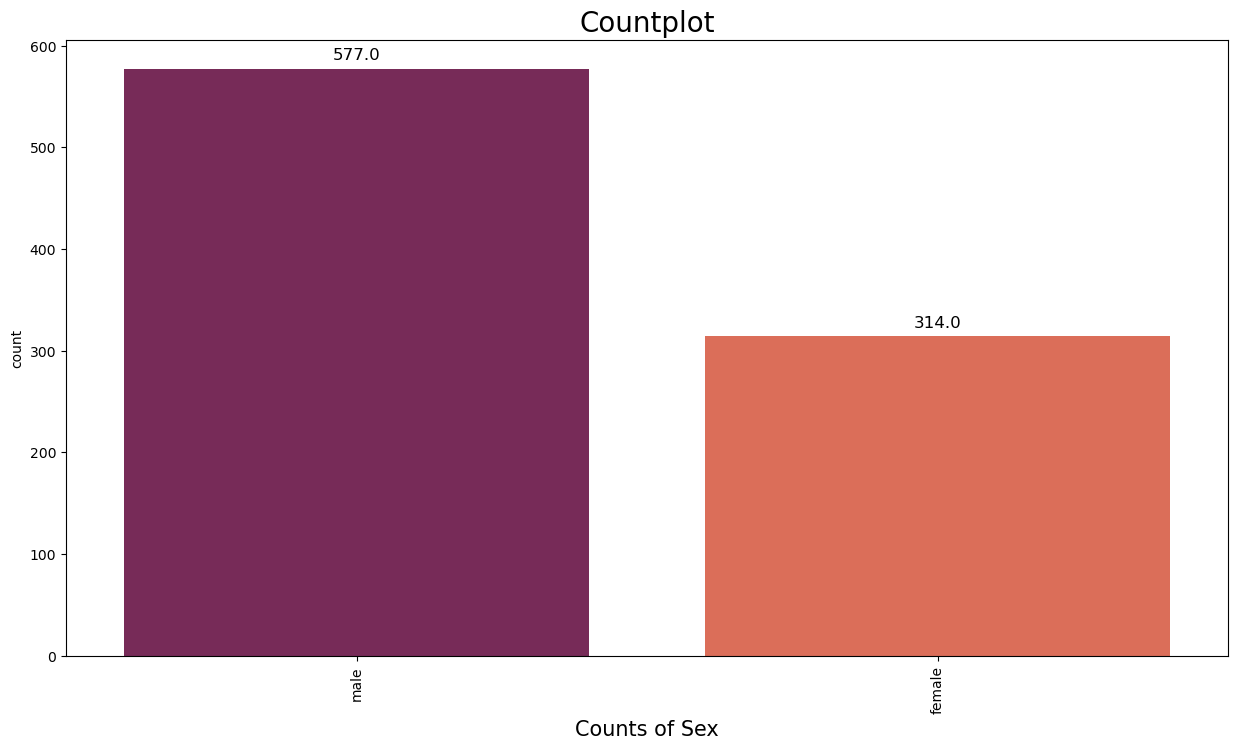

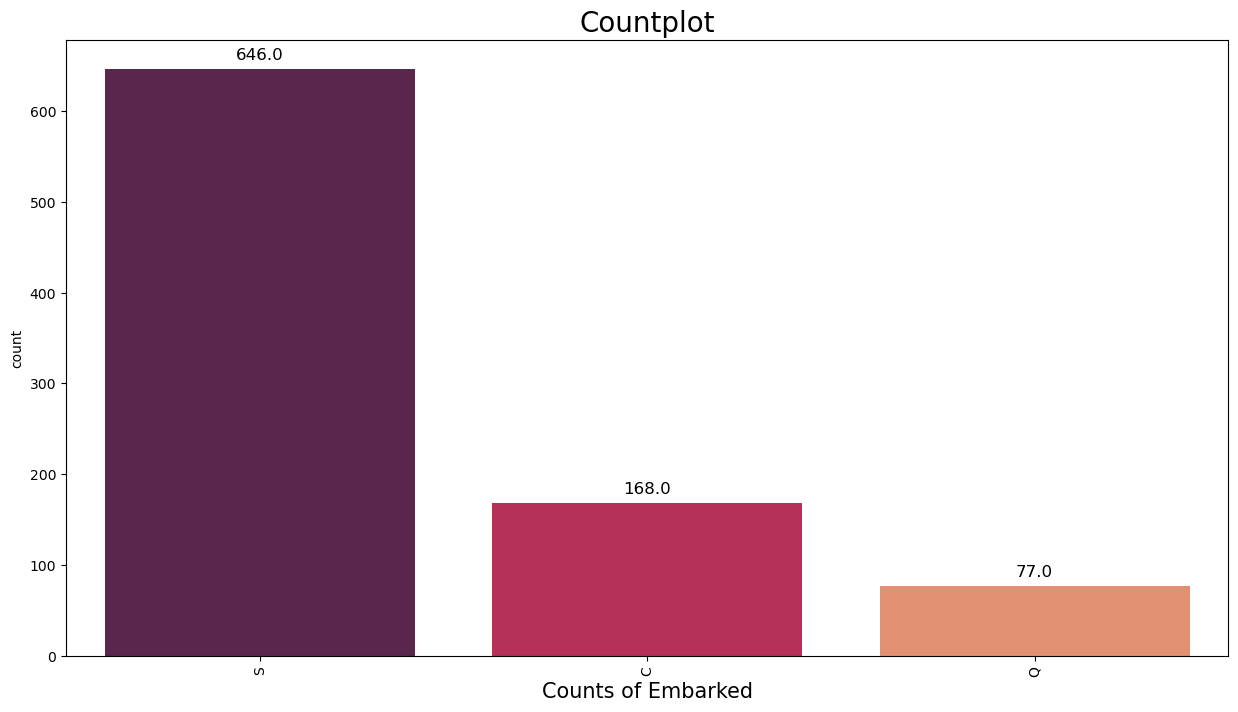

In [687]:
# Run the function:
df_train_cat = df_train.select_dtypes(include='object')
countplot(df_train_cat, df_train_cat.columns)

### Visual insights:
 - Most passengers onboard were males as they show higher count of 577.
 - Total of 646 Passengers boarded from S.

### Visualizing distribution with Pie-Chart:

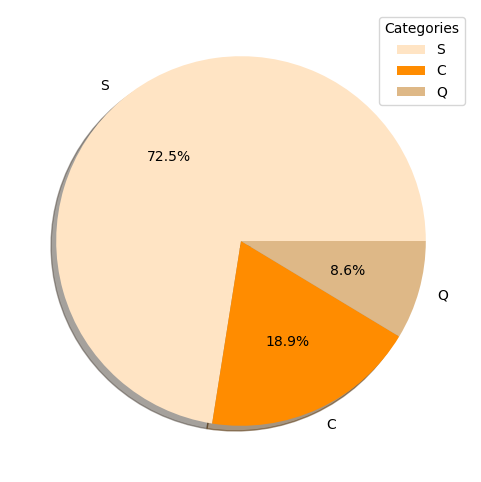

In [690]:
# Data:
labels = df_train['Embarked'].unique()
sizes = df_train['Embarked'].value_counts()

# Plot pie chart:
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels, autopct='%1.1f%%',colors=['bisque','darkorange','burlywood'], shadow=True)
plt.legend(labels, title='Categories',loc='best')
plt.show()

##### Insights on Embarked:
 - 72.5% of passengers boarded titanic from Southampton(S)
 - Only 8.6% of passengers boarded from Queenstown(Q)

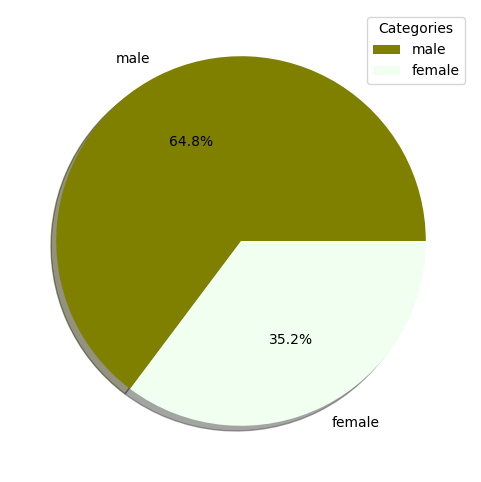

In [692]:
# Data:
labels = df_train['Sex'].unique()
sizes = df_train['Sex'].value_counts()

# Plot pie chart:
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels, autopct='%1.1f%%',colors=['olive','honeydew'], shadow=True)
plt.legend(labels, title='Categories',loc='best')
plt.show()

##### Insights on Gender:
 - Ratio of males were larger than females
 - Males = 64.8% , Females = 35.2%

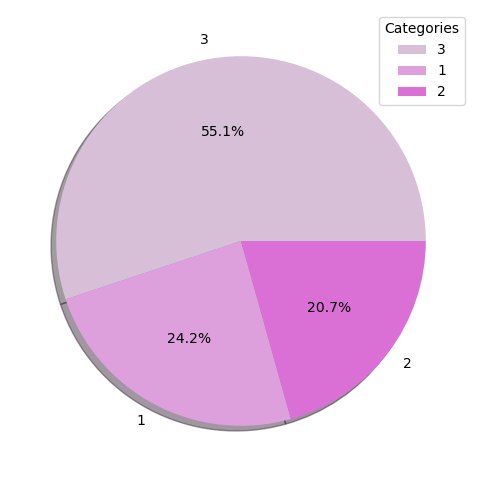

In [694]:
# Data:
labels = df_train['Pclass'].unique()
sizes = df_train['Pclass'].value_counts()

# Plot pie chart:
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels, autopct='%1.1f%%',colors=['thistle','plum','orchid'], shadow=True)
plt.legend(labels, title='Categories',loc='best')
plt.show()

##### Insights on Pclass:
 - More than 50% of the passengers belonged to Pclass - 3
 - This shows only a few percentage of passengers could afford Pclass - 1 standing at 24.2%

## Boxplot Visualization: 

In [697]:
def boxplot(data,columns):
    # Loop through each column in the list of columns provided
    for col in columns:
        Q1 = data[col].quantile(0.25)    # Calculate the 1st quartile (25th percentile) of the column
        Median = data[col].median()      # Calculate the median (50th percentile) of the column
        Q3 = data[col].quantile(0.75)    # Calculate the 3rd quartile (75th percentile) of the column

        
        iqr_range = Q3 - Q1
        spacing = iqr_range * 0.1                  # Set spacing for placement of text annotations on the plot
        
        plt.figure(figsize=(8,6))        # Create a new figure with a specified size
        
        sns.boxplot(y = data[col],palette='magma')    # Create a boxplot for the column data using seaborn
        
        # Add a text annotation for Q1 (25th percentile), positioned slightly below the box
        plt.text(-0.35,Q1 - spacing,f'Q1: {Q1}', ha = 'left', va = 'bottom',fontsize = 10,color = 'black')

        # Add a text annotation for the Median (50th percentile), positioned on the median line
        plt.text(0,Median,f'Median: {Median}',ha = 'center', va = 'bottom',fontsize = 10,color = 'black')

        # Add a text annotation for Q3 (75th percentile), positioned slightly above the box
        plt.text(+0.35,Q3 + spacing,f'Q3: {Q3}',ha = 'right', va = 'bottom',fontsize = 10,color = 'black')

        
        plt.title(f'Boxplot of {col}')   # Set the title of the plot using the column name
        plt.show()                       # Display the boxplot

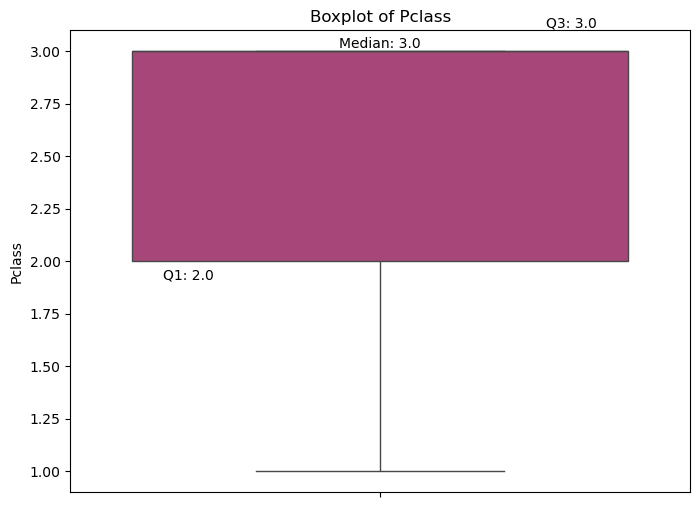

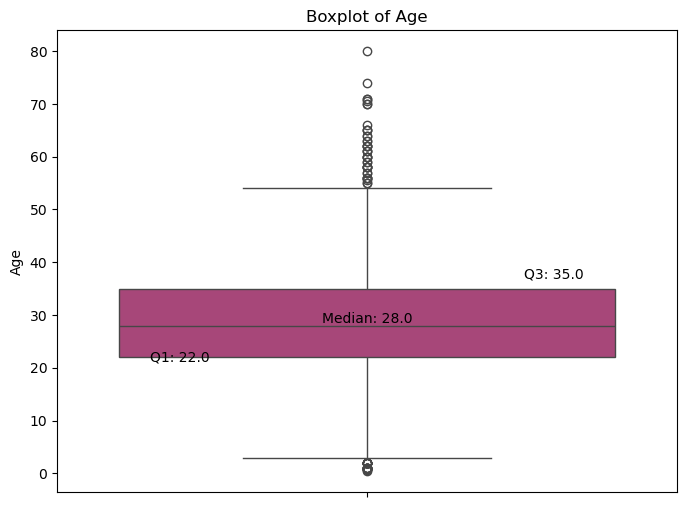

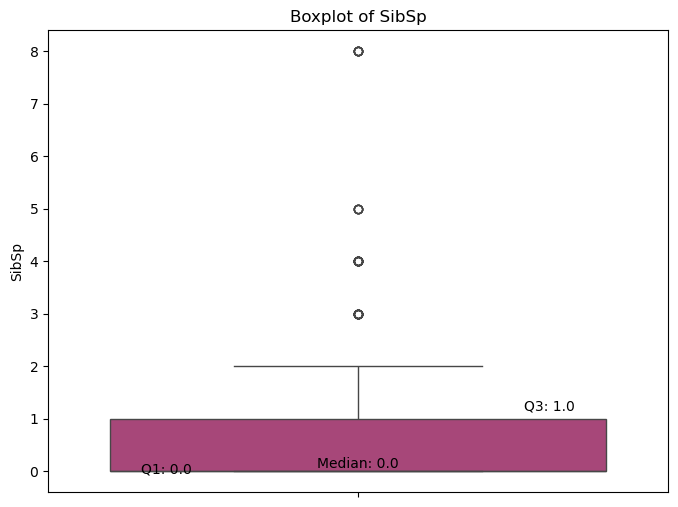

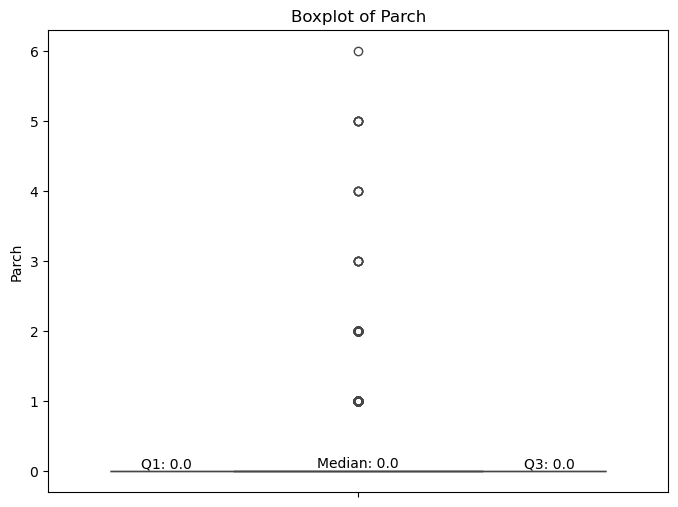

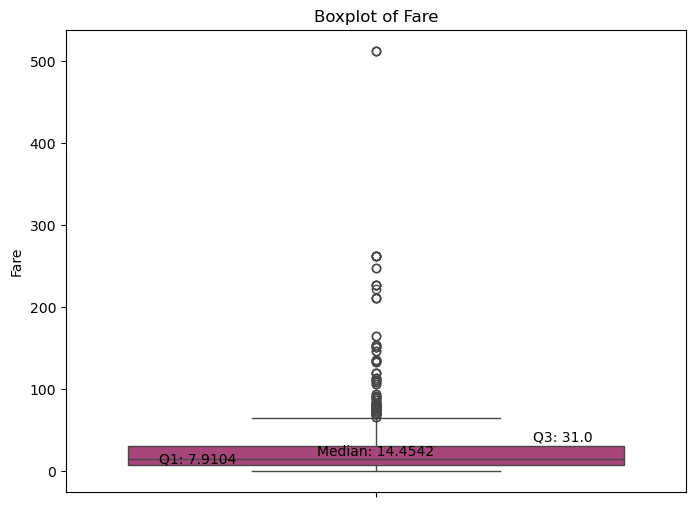

In [698]:
boxplot(df_train_num, df_train_num.drop(columns='Survived', axis=1))

### Scatterplot - Pairplot visual:

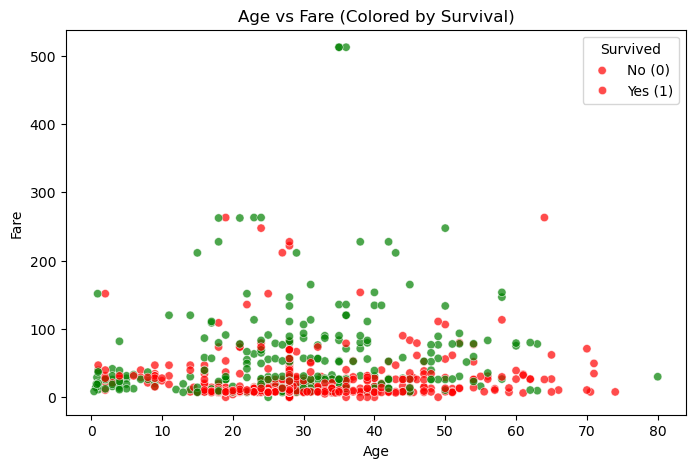

In [700]:
# Scatter plot AGE VS FARE
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_train['Age'], y=df_train['Fare'], hue=df_train['Survived'], palette={0: 'red', 1: 'green'}, alpha=0.7)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare (Colored by Survival)")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])

# Show plot
plt.show()

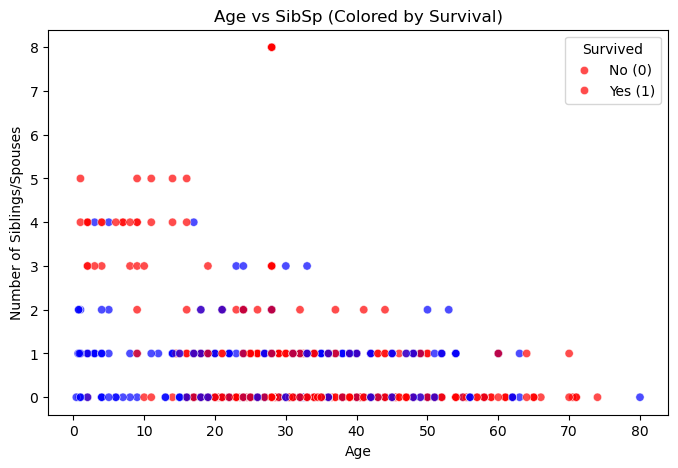

In [701]:
# Scatter PLot AGE VS SIBSP(Siblings/spouses)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_train['Age'], y=df_train['SibSp'], hue=df_train['Survived'], palette={0: 'red', 1: 'blue'}, alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Number of Siblings/Spouses")
plt.title("Age vs SibSp (Colored by Survival)")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])

plt.show()

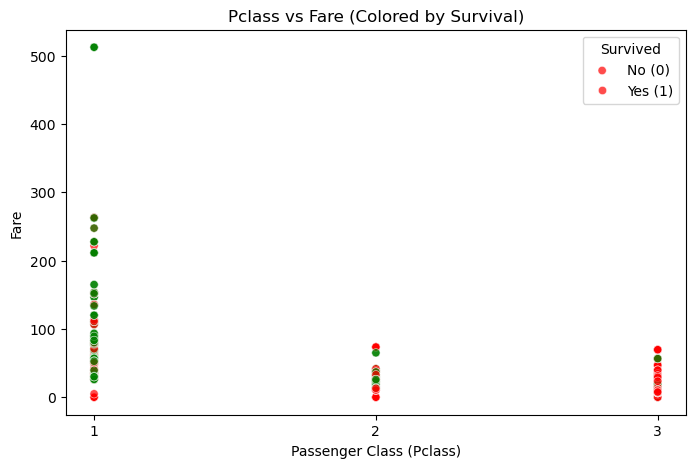

In [702]:
# Scatter Plot Pclass VS Fare
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_train['Pclass'], y=df_train['Fare'], hue=df_train['Survived'], palette={0: 'red', 1: 'green'}, alpha=0.7)

plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Fare")
plt.title("Pclass vs Fare (Colored by Survival)")
plt.xticks([1, 2, 3])  # Ensure Pclass values are discrete
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])

plt.show()

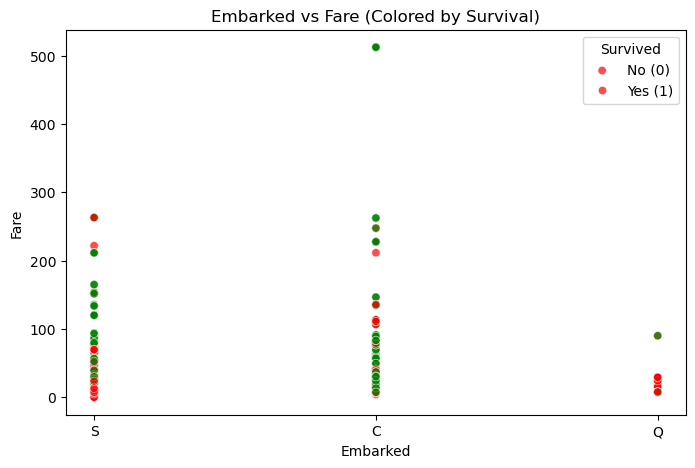

In [703]:
# Scatter Plot Fare VS Embarked
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_train['Embarked'], y=df_train['Fare'], hue=df_train['Survived'], palette={0: 'red', 1: 'green'}, alpha=0.7)

plt.xlabel("Embarked")
plt.ylabel("Fare")
plt.title("Embarked vs Fare (Colored by Survival)")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])

plt.show()

<Figure size 1500x1000 with 0 Axes>

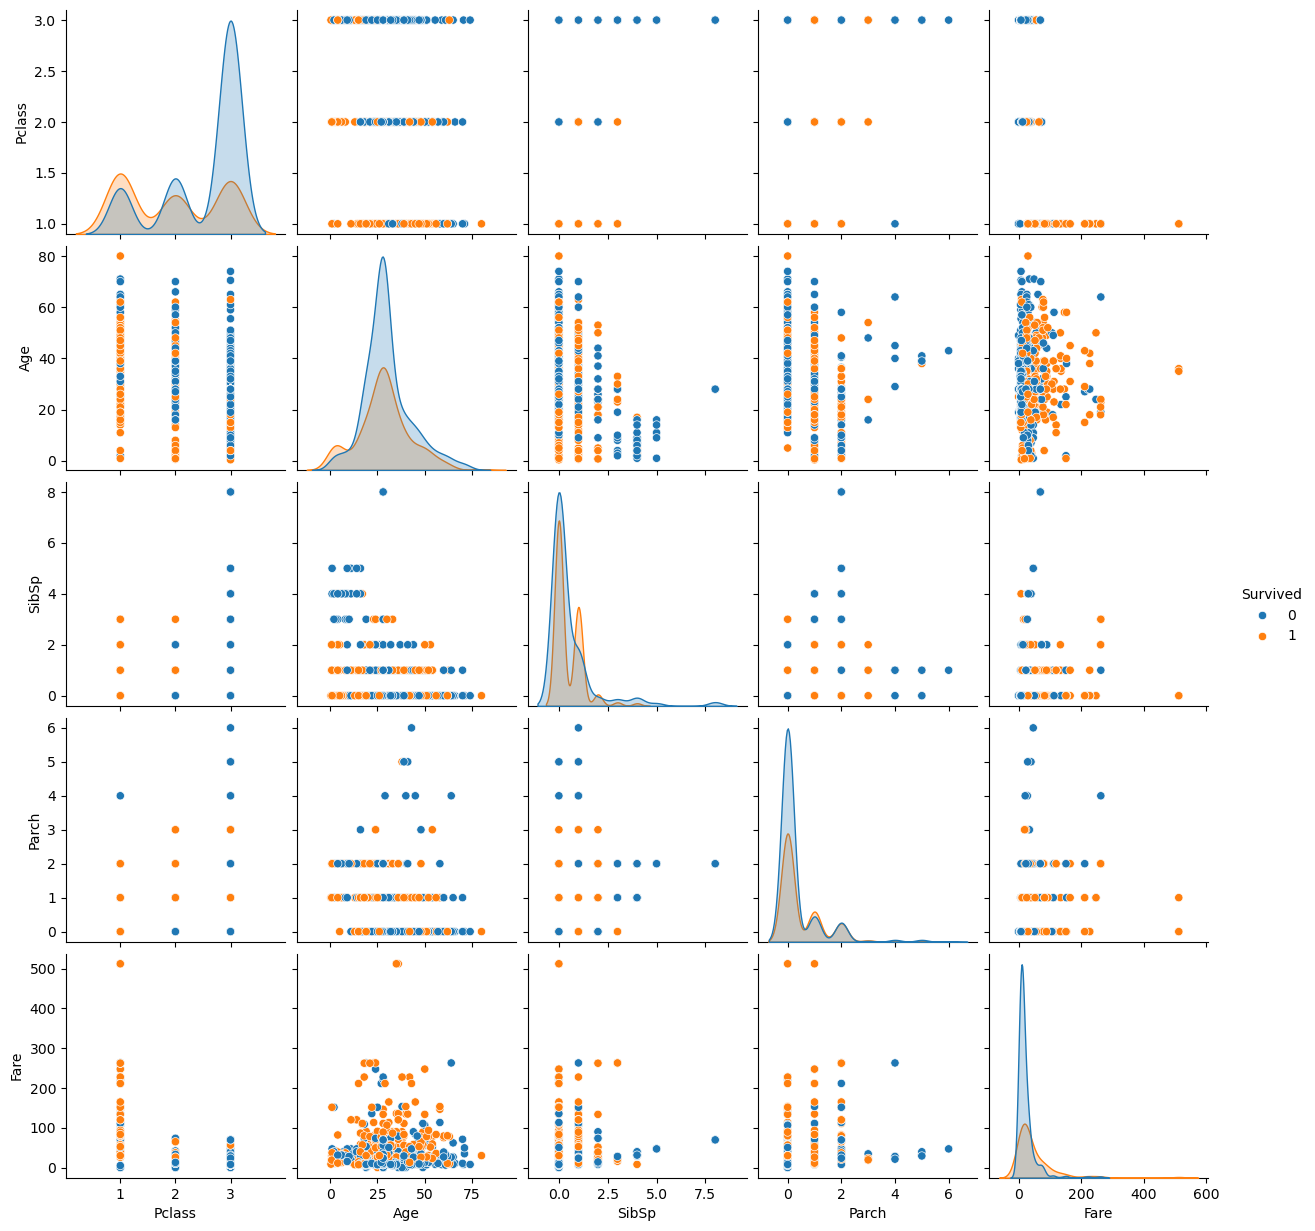

In [704]:
# Pairplot Visual

plt.figure(figsize=(15, 10))
sns.pairplot(df_train, hue="Survived")  # Based on Survived
plt.show()

In [705]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [706]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [707]:
# Will merge both the datasets:
df_full = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [708]:
df_full = df_full.dropna(subset=['Survived'])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


## Data Preprocessing: 
---

In [710]:
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [711]:
# Applying pd.get dummies on Embarked and Label Encoder on Sex column:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                # Initialize the encoder
df_full['Sex'] = le.fit_transform(df_full['Sex'])  # Fit and transform Sex column

df_encoded = pd.get_dummies(df_full, columns=['Embarked'], drop_first=False)  # Encode Embarked columns(Similar to One-hot encoding)

# Convert boolean columns to integers
df_encoded = df_encoded.astype(int)

# Update df_merged with the new encoded DataFrame
df_full = df_encoded.copy()

# Display the updated DataFrame
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7,0,0,1
1,1,1,0,38,1,0,71,1,0,0
2,1,3,0,26,0,0,7,0,0,1
3,1,1,0,35,1,0,53,0,0,1
4,0,3,1,35,0,0,8,0,0,1


In [712]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int32
 1   Pclass      891 non-null    int32
 2   Sex         891 non-null    int32
 3   Age         891 non-null    int32
 4   SibSp       891 non-null    int32
 5   Parch       891 non-null    int32
 6   Fare        891 non-null    int32
 7   Embarked_C  891 non-null    int32
 8   Embarked_Q  891 non-null    int32
 9   Embarked_S  891 non-null    int32
dtypes: int32(10)
memory usage: 41.8 KB


## Correlation Heatmap:
---

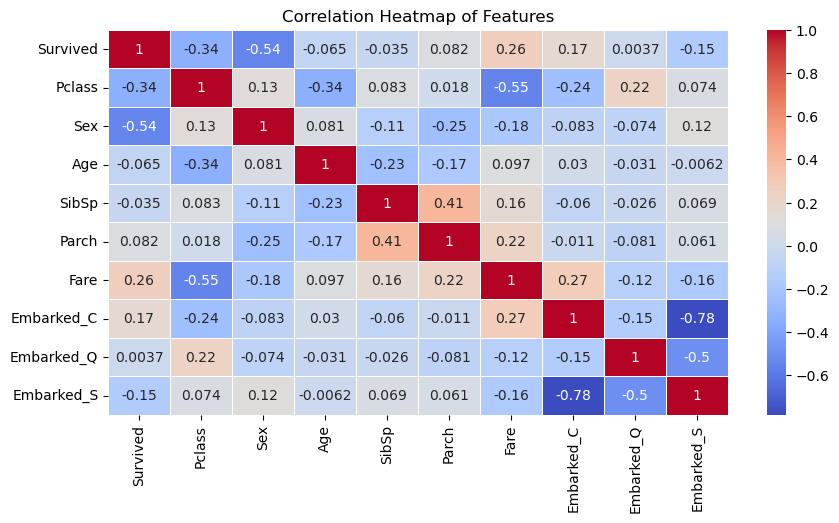

In [714]:
# Compute the correlation matrix of the dataframe
df_corr = df_full.corr()  # Calculates correlation between all numeric columns

# Set the figure size for better visualization
plt.figure(figsize=(10,5))  # Width = 10, Height = 5

# Create a heatmap using seaborn
sns.heatmap(df_corr,  # Use the correlation matrix
            annot=True,  # Display correlation values on the heatmap
            cmap='coolwarm',  # Color theme (blue to red)
            linewidths=0.5)  # Add lines between cells for better readability

# Add a title to the heatmap
plt.title('Correlation Heatmap of Features')

# Display the heatmap
plt.show()

**The heatmap shows strong negative multicollinearity in Features - 'Embarked_S to Embarked_C'**

## VIF - Variance Inflation Factor to confirm Multicollinearity between features:
---

In [717]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_full.columns
vif_data["VIF"] = [variance_inflation_factor(df_full.values, i) for i in range(len(df_full.columns))]

# Display the VIF values
print(vif_data)

      feature        VIF
0    Survived   1.660474
1      Pclass   1.920843
2         Sex   1.533761
3         Age   1.256746
4       SibSp   1.298673
5       Parch   1.332643
6        Fare   1.653367
7  Embarked_C   8.693797
8  Embarked_Q   5.145921
9  Embarked_S  31.066336


**As per shown above, Embarked C and Embarked S show multicollinearty and it's better to drop Embarked S with such high VIF Score**

In [719]:
# Will drop Embarked_S column:
df_full.drop(columns=['Embarked_S'], axis=1, inplace=True)
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,0,3,1,22,1,0,7,0,0
1,1,1,0,38,1,0,71,1,0
2,1,3,0,26,0,0,7,0,0
3,1,1,0,35,1,0,53,0,0
4,0,3,1,35,0,0,8,0,0


## Model Building Stage:
---

### Importing Models and train test split packages:

In [722]:
# Importing:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier                     # Light Gradient Boost Model
from xgboost import XGBClassifier                       # Extreme Gradient Boost Model

#### Train-Test-Split:

In [724]:
# Split into Features(X) and target(y)

X = df_full.drop(columns='Survived', axis=1)     # Feature Variables
y = df_full['Survived']                          # Target Variable

In [725]:
# Using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Feature Scaling:

In [727]:
# Import the scaler:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler:
sc = StandardScaler()

# Scaling X_train and X_test
X_train_scaled = sc.fit_transform(X_train)       # Fit transform on Trained set
X_test_scaled = sc.transform(X_test)             # Only transform on Test set(unseen data)

### Model training:
---

#### Light Gradient Boost:

In [730]:
# Initialize the model:
lgb = LGBMClassifier()

# Fit (Train) the model:
lgb.fit(X_train_scaled, y_train)

# Run model for prediction:
y_pred_lgb = lgb.predict(X_test_scaled)   # For Accuracy Score
y_pred_proba_lgb = lgb.predict_proba(X_test_scaled)[:,1]  # For Roc Auc Score

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### Model Evaluation:
#### LGBoost
---

In [732]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, roc_auc_score, confusion_matrix

In [733]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred_proba))  # Uses probabilities

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

In [734]:
evaluate_model(y_test, y_pred_lgb, y_pred_proba_lgb, "LightGBM")


LightGBM Performance:
Accuracy: 0.8100558659217877
Precision: 0.7868852459016393
Recall: 0.6956521739130435
F1-score: 0.7384615384615385
ROC AUC Score: 0.8216732542819499

Confusion Matrix:
[[97 13]
 [21 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



## Insights:
 - LightGBM peforms well with an accuracy score of 81% along with Roc Auc Score of 82.16%
 - Precision (79%) → When the model predicts survival (1), it is correct 79% of the time.
 - Recall (70%) → The model correctly identifies 70% of actual survivors.
 - F1-score (74%) → A balanced measure of precision & recall.
 - True Negatives (97) → Correctly predicted non-survivors.
 - False Positives (13) → Incorrectly predicted survivors (Type I error).
 - False Negatives (21) → Missed actual survivors (Type II error).
 - True Positives (48) → Correctly predicted survivors.

---

### Cross-Validation and HyperParameter Tuning for LightGBM:

In [737]:
# Import package:
from sklearn.model_selection import cross_val_score

In [738]:
# Perform a 5-Fold cross validation for LightGBM:

cross_val_lgb = cross_val_score(lgb, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the validation scores:
print("LightGBM Cross-Validation Accuracy Scores:", cross_val_lgb)
print("LightGBM Mean Accuracy:", cross_val_lgb.mean())

[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**LightGBM model has a mean cross-validation accuracy of 80.20%, which is a good indicator of its generalizability across different subsets of data.**

### Hyperparameter Tuning using GridSearchCV for LightGBM:

In [741]:
# Import the package:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid:
param_grid = {'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 1.0]
}

# Initialize the LightGBM Classifier
lgb_tuned = LGBMClassifier()

# Perform the Grid Search
grid_lgb = GridSearchCV(lgb_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train_scaled, y_train)

# Get the best parameters and score:
print("Best Hyperparamters for LightGBM:", grid_lgb.best_params_)
print("Best Accuracy Score:", grid_lgb.best_score_)

# Update the model:
lgb_best = grid_lgb.best_estimator_

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


#### Extreme Gradient Boost:
---

In [743]:
# Initialize the model:
xgb = XGBClassifier()

# Fit the model
xgb.fit(X_train_scaled, y_train)

# Run model for prediction:
y_pred_xgb = xgb.predict(X_test_scaled)     # For accuracy score
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]    # For Roc Auc Score

### Model Evaluation:
#### XGBoost
---

In [745]:
evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb, "XGBoost")


XGBoost Performance:
Accuracy: 0.8100558659217877
Precision: 0.7692307692307693
Recall: 0.7246376811594203
F1-score: 0.746268656716418
ROC AUC Score: 0.7284584980237154

Confusion Matrix:
[[95 15]
 [19 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Insights:
 - XGM performs well with an accuracy score of 81% meaning it predicts well.
 - Precision (0.77 for Class 1): When XGBoost predicts a passenger survived, it is correct 77% of the time.
 - Recall (0.72 for Class 1): It captures 72% of actual survivors, meaning some survivors are misclassified.
 - F1-score (0.75 for Class 1): A balanced score between precision and recall, showing reasonable trade-off.
 - ROC AUC Score: 0.7285: Lower than LightGBM’s (0.8217) → XGBoost is not as strong in separating classes compared to LightGBM.

### Cross-Validation and HyperParameter Tuning for XGBM:
---

In [748]:
# Perform 5-fold cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy Scores:", cv_scores_xgb)
print("XGBoost Mean Accuracy:", cv_scores_xgb.mean())

XGBoost Cross-Validation Accuracy Scores: [0.77622378 0.74825175 0.81690141 0.80985915 0.8028169 ]
XGBoost Mean Accuracy: 0.7908105978528515


## Hyperparameter Tuning using GridSearchCV for XGBM:

In [750]:
# Define hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_tuned = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform Grid Search
grid_xgb = GridSearchCV(xgb_tuned, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Hyperparameters for XGBoost:", grid_xgb.best_params_)
print("Best Accuracy Score:", grid_xgb.best_score_)

# Update model with best params
xgb_best = grid_xgb.best_estimator_

Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy Score: 0.8203092681965922


**The optimized XGBoost model with tuned hyperparameters achieved 82.03% accuracy, showing improved generalization and balanced performance**

## Final Evaluation of LGBM and XGBM Tuned:
---

In [753]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_lgb = lgb_best.predict(X_test_scaled)
y_pred_xgb = xgb_best.predict(X_test_scaled)

# Evaluate models
print("\nLightGBM Performance:")
print(classification_report(y_test, y_pred_lgb))

print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


LightGBM Performance:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       110
           1       0.82      0.54      0.65        69

    accuracy                           0.78       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.78      0.76       179


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



# Model Comparison Insights:
 - XGBoost outperforms LightGBM in overall accuracy (79% vs. 78%), indicating better generalization.
 - XGBoost has a higher recall (67%) for class 1 (Survived) than LightGBM (54%), meaning it detects more actual survivors.
 - LightGBM achieves higher precision (82%) for class 1, meaning fewer false positives in predicting survivors.
 - LightGBM excels in class 0 (Not Survived) recall (93%), capturing almost all non-survivors correctly.
 - XGBoost provides a better balance between precision and recall, with a higher F1-score (71% vs. 65%) for survivors.

### Conclusion: XGBoost is a better choice for balanced prediction, while LightGBM is preferable if minimizing false survivor predictions is crucial.

# Visualizing Plots:
---

## Confusion Matrix Visual:

In [830]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

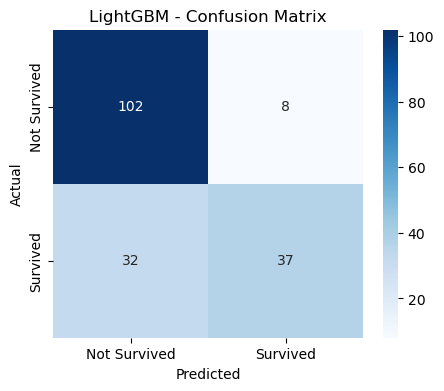

In [819]:
# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Run the function:
plot_conf_matrix(y_test, y_pred_lgb, "LightGBM")

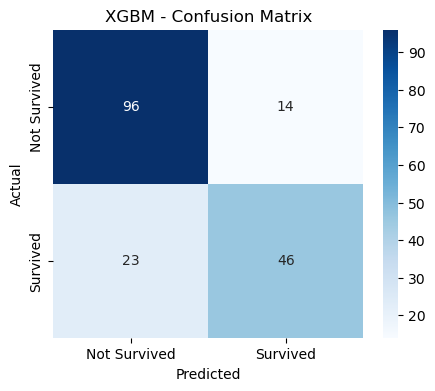

In [821]:
plot_conf_matrix(y_test, y_pred_xgb, "XGBM")

In [853]:
# Metric	                 # LightGBM	                  # XGBoost
#True Negatives	               # 102	                    # 96
#False Positives		       # 8	                     	# 14
#False Negatives		       # 32	               	        # 23
#True Positives		           # 37		                    # 46

 - LightGBM excels in precision for "Not Survived" cases (fewer false positives).
 - XGBoost is better at detecting "Survived" cases (fewer false negatives, higher recall).

## ROC AUC CURVE Visual:

In [832]:
# Function to plot ROC Curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

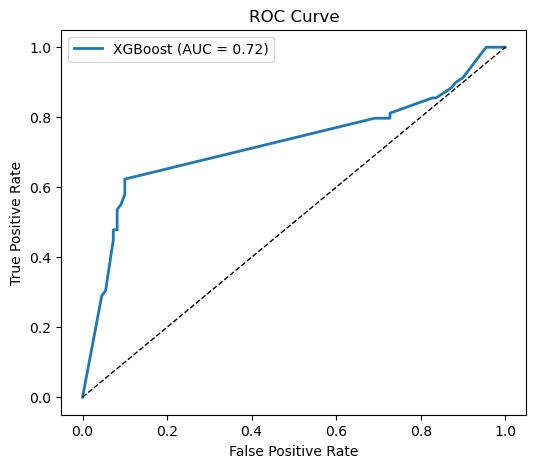

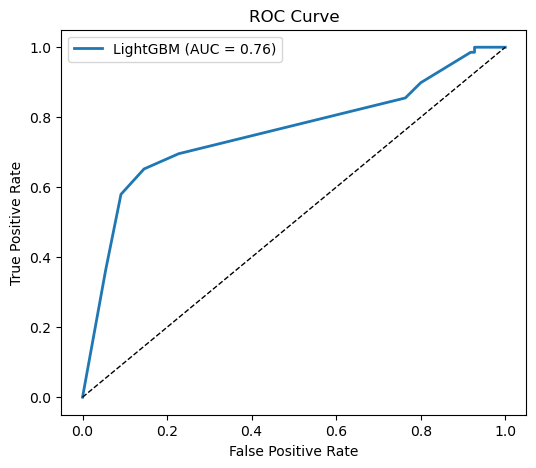

In [834]:
# ROC Curve for both models
plot_roc_curve(y_test, xgb_best.predict_proba(X_test)[:, 1], "XGBoost")
plot_roc_curve(y_test, lgb_best.predict_proba(X_test)[:, 1], "LightGBM")

## Precision Recall Curve Visual:

In [837]:
# Function to plot Precision-Recall Curve
def plot_pr_curve(y_true, y_pred_prob, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'{model_name}', linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

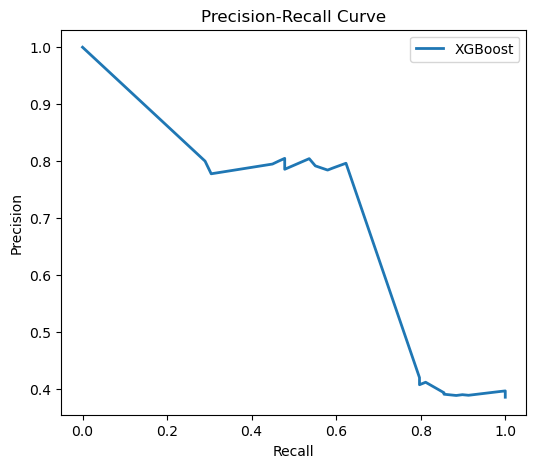

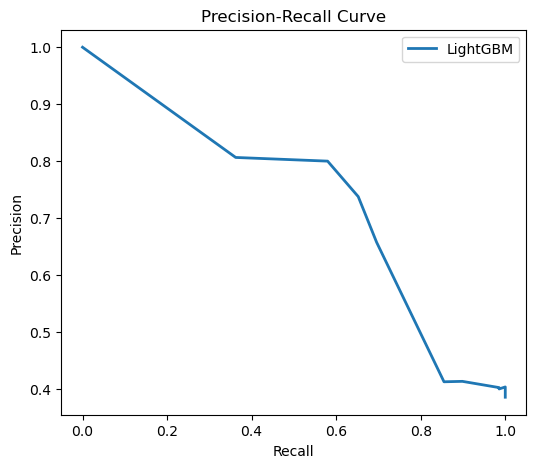

In [839]:
# Precision-Recall Curve for both models
plot_pr_curve(y_test, xgb_best.predict_proba(X_test)[:, 1], "XGBoost")
plot_pr_curve(y_test, lgb_best.predict_proba(X_test)[:, 1], "LightGBM")

## Feature Importance PLot:

In [846]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()
    
    plt.figure(figsize=(8, 5))
    plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx], color='teal')
    plt.xlabel("Feature Importance")
    plt.title(f"{model_name} - Feature Importance")
    plt.show()

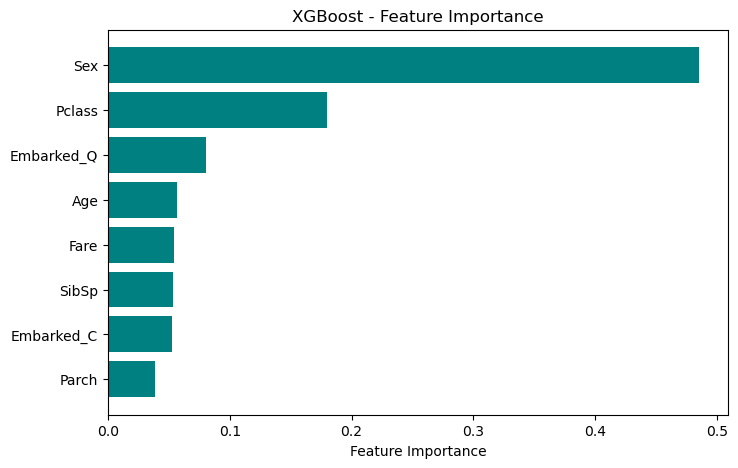

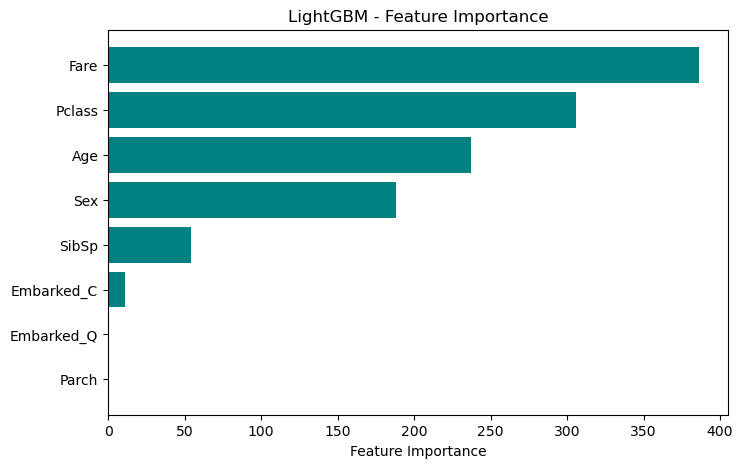

In [848]:
# Feature Importance for both models
plot_feature_importance(xgb_best, X_train.columns, "XGBoost")
plot_feature_importance(lgb_best, X_train.columns, "LightGBM")

## XGBoost Feature Importance:
 - Sex – The most dominant feature, indicating that gender is the strongest predictor of survival.
 - Pclass (Passenger Class) – The second most important feature, showing that ticket class significantly affects survival chances.
 - Embarked_Q – Some impact, possibly indicating that people who embarked from location "Q" had different survival probabilities.
 - Age – Plays a role but is not as critical as "Sex" and "Pclass."
 - Fare, SibSp, Embarked_C, Parch – Less important but still contribute to the model.

### Key Observation: XGBoost relies heavily on Sex and Pclass, while other features contribute much less.

## LightGBM Feature Importance:
 - Fare – The most important feature, meaning ticket price plays a major role in survival predictions.
 - Pclass – Similar to XGBoost, class ranking significantly affects survival probability.
 - Age – More influential in LightGBM than in XGBoost, meaning age is a stronger differentiator in this model.
 - Sex – Important but not the top feature (unlike XGBoost).
 - SibSp, Embarked_C, Embarked_Q, Parch – Less significant.

### Key Observation: Unlike XGBoost, Fare is the most important feature in LightGBM, while Sex has a lower importance ranking compared to Age.

# XGBoost relies more on gender for classification, whereas LightGBM gives higher importance to Fare and Age.
# Both models agree that Pclass (ticket class) is a key factor.

---

# Brief Overview:

## This analysis compares XGBoost and LightGBM for survival prediction.

### Confusion Matrix Findings:

 - XGBoost balances survivor and non-survivor predictions better.
 - LightGBM is more accurate for non-survivors but struggles with survivors.
 
### Feature Importance:

 - XGBoost relies more on Sex and Pclass.
 - LightGBM prioritizes Fare, Pclass, and Age over Sex.

### Key Takeaway:

 - XGBoost is preferable for identifying survivors.
 - LightGBM is better at predicting non-survivors and considers financial factors.
 - Model choice depends on whether demographics (XGBoost) or financial aspects (LightGBM) are more critical.

---